# Synthesize unitary operations

A unitary operation describes a norm-preserving change to a quantum system.
For $n$ qubits this change is described by a $2^n \times 2^n$ dimensional, complex matrix $U$ whose adjoint equals the inverse, that is $U^\dagger U = \mathbb{1}$.

Synthesizing specific unitary operations into a set of quantum gates is a fundamental task used, for example, in the design and application of quantum algorithms or in compiling quantum circuits.

While efficient synthesis is possible for certain classes of unitaries – like those composed of Clifford gates or having a tensor product structure – most unitaries do not fall into these categories.
For general unitary matrices, synthesis is a complex task with computational costs that increase exponentially with the number of qubits.
Therefore, if you know an efficient decomposition for the unitary you would like to implement, it will likely be better than a general synthesis.

<Admonition type="note">
    If no decomposition is available, the Qiskit SDK provides you with the tools to find one.
    However, note that this generally generates deep circuits that may be unsuitable to run on noisy quantum computers.
</Admonition>

In [1]:
import numpy as np
from qiskit import QuantumCircuit

U = 0.5 * np.array(
    [[1, 1, 1, 1], [-1, 1, -1, 1], [-1, -1, 1, 1], [-1, 1, 1, -1]]
)

circuit = QuantumCircuit(2)
circuit.unitary(U, circuit.qubits)

## Re-synthesis for circuit optimization

Sometimes it is beneficial to re-synthesize a long series of single- and two-qubit gates, if the length can be reduced. For example, the following circuit uses three two-qubit gates.

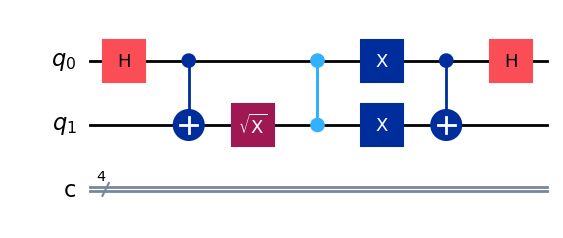

In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qreg_q = QuantumRegister(2, "q")
creg_c = ClassicalRegister(4, "c")
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.sx(qreg_q[1])
circuit.cz(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[1])
circuit.x(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.draw("mpl")

However, after re-synthesizing with the following code, it only needs a single CX gate. (Here we use the `QuantumCircuit.decompose()` method to better visualize the gates used to re-synthesize the unitary.)

In [3]:
from qiskit.quantum_info import Operator

# compute unitary matrix of circuit
U = Operator(circuit)

# re-synthesize
better_circuit = QuantumCircuit(2)
better_circuit.unitary(U, range(2))
better_circuit.decompose().draw()

global phase: 4.9931
      ┌───────────────┐        ┌───────────────┐  
q_0: ─┤ U(π/2,-π/2,0) ├───■────┤ U(π/2,0,-π/2) ├──
     ┌┴───────────────┴┐┌─┴─┐┌─┴───────────────┴─┐
q_1: ┤ U(2.1322,π/2,0) ├┤ X ├┤ U(π/2,-0.56139,0) ├
     └─────────────────┘└───┘└───────────────────┘

Qiskit's [transpile](../api/qiskit/compiler#qiskit.compiler.transpile) function automatically performs this re-synthesis for a sufficiently high optimization level.

## Next steps

<Admonition type="tip" title="Recommendations">
  -  See an example of circuit decomposition in the [Grover's Algorithm](https://learning.quantum.ibm.com/tutorial/grovers-algorithm) tutorial.
  -  For more information about the Qiskit transpiler, visit the [Transpile section](./transpile).
</Admonition>